In [2]:
import json
from urllib.request import urlopen
import arcpy
from arcpy import env
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [3]:
arcpy.env.overwriteOutput = True

In [16]:
# function to convert json from url to features
def json2shp(url_string, json_folder, geodatabase, filename):
    response = urlopen(url_string)
    data = response.read()
    txt_str = data.decode('utf-8')
    lines = txt_str.split("\r\n")
    path = json_folder + '/' + filename + '.json'
    fx = open(path, "w")
    for line in lines:
        fx.write(line+ "\n")
    fx.close()
    arcpy.JSONToFeatures_conversion(path, os.path.join(geodatabase, filename))

url_string = "https://services.arcgis.com/uUvqNMGPm7axC2dD/arcgis/rest/services/oregondot_its_facilities_and_signals/FeatureServer/3/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token="

In [4]:
path = "//clsrv111.int.lcog.org/transpor/MPO/RTP/FY20 2045 Update/Data and Resources/Data"

In [6]:
filename = "ODOT_traffic_signals"

In [5]:
geodatabase = os.path.join(path, "StoryMap/StoryMap.gdb")

json2shp(url_string, path, geodatabase, filename)

In [17]:
url_string = "https://services6.arcgis.com/5YJfprDR6T2FT4tY/ArcGIS/rest/services/Traffic_Infrastructure_View/FeatureServer/2/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=" # Springfield signals

In [18]:
filename = "SPR_traffic_signals"

In [19]:
json2shp(url_string, path, geodatabase, filename)

In [7]:
ODOT_signals = gpd.read_file(geodatabase, layer = "ODOT_traffic_signals")

In [8]:
list(ODOT_signals)

['HWYNAME',
 'HWYNUMB',
 'ST_HWY_SFX',
 'RDWY_ID',
 'MLGE_TYP',
 'OVLP_CD',
 'MP',
 'LRS_KEY',
 'LRM_KEY',
 'LAT',
 'LONGTD',
 'HRZ_COL_M',
 'CRD_RF_DTM',
 'EFFECTV_DT',
 'GIS_PRC_DT',
 'geometry']

In [9]:
ODOT_signals.head()

,HWYNAME,HWYNUMB,ST_HWY_SFX,RDWY_ID,MLGE_TYP,OVLP_CD,MP,LRS_KEY,LRM_KEY,LAT,LONGTD,HRZ_COL_M,CRD_RF_DTM,EFFECTV_DT,GIS_PRC_DT,geometry
0,CASCADE HWY SOUTH,160,00,1,0,0,3.59,016000100S00,16000I00,45.32361,-122.57883,3,NAD 83,2017,12/27/2017,POINT (777703.025 1309393.580)
1,COOS BAY-ROSEBURG,035,00,1,0,0,73.37,003500100S00,03500I00,43.12217,-123.41290,3,NAD 83,2017,12/27/2017,POINT (534811.335 514012.785)
2,CORVALLIS-LEBANON,210,00,1,0,0,-0.05,021000100S00,21000I00,44.56632,-123.25986,3,NAD 83,2017,12/27/2017,POINT (593335.300 1038641.700)
3,CORVALLIS-LEBANON,210,00,1,0,0,0.34,021000100S00,21000I00,44.56470,-123.25215,3,NAD 83,2017,12/27/2017,POINT (595323.200 1037985.200)
4,CORVALLIS-LEBANON,210,00,1,0,0,9.95,021000100S00,21000I00,44.55579,-123.06353,3,NAD 83,2017,12/27/2017,POINT (644344.800 1033150.200)


In [10]:
ODOT_signals.crs

<Projected CRS: EPSG:2992>
Name: NAD83 / Oregon GIC Lambert (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon.
- bounds: (-124.6, 41.98, -116.47, 46.26)
Coordinate Operation:
- name: Oregon GIC Lambert (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
ODOT_signals['id'] = list(range(1,  ODOT_signals.shape[0]+1, 1))

In [37]:
ODOT_signals['source'] = np.repeat('ODOT', ODOT_signals.shape[0])

In [39]:
ODOT_signals = ODOT_signals.rename(columns={'HWYNAME': 'street'})

In [21]:
SPR_signals = gpd.read_file(geodatabase, layer = "SPR_traffic_signals")

In [22]:
list(SPR_signals)

['COMPKEY',
 'UNITID',
 'UNITDESC',
 'UNITTYPE',
 'SUBAREA',
 'DISTRICT',
 'SPECINST',
 'QUICNET4',
 'INTKEY',
 'COMPTYPE',
 'X',
 'Y',
 'INT_UNITID',
 'GlobalID',
 'geometry']

In [23]:
SPR_signals.head()

,COMPKEY,UNITID,UNITDESC,UNITTYPE,SUBAREA,DISTRICT,SPECINST,QUICNET4,INTKEY,COMPTYPE,X,Y,INT_UNITID,GlobalID,geometry
0,1018035,325,GATEWAY ST @ GATEWAY LOOP,V/P,None,CITY,None,59.0,1041841.0,74.0,4.253401e+06,889683.786574,17048,{00000000-0000-0000-0000-000000000000},POINT (4253409.834 889685.566)
1,1035112,430X,SPORTS WAY STATION,None,None,None,these are the black decorative lights along th...,NaN,1041837.0,74.0,4.253303e+06,892724.780492,17031,{00000000-0000-0000-0000-000000000000},POINT (4253311.085 892726.566)
2,1035112,430X,SPORTS WAY STATION,None,None,None,these are the black decorative lights along th...,NaN,1041837.0,74.0,4.253303e+06,892724.780492,17031,{00000000-0000-0000-0000-000000000000},POINT (4253311.085 892726.566)
3,1018065,299,HARLOW RD @ BEVERLY ST,V/P,None,CITY,None,48.0,1041803.0,74.0,4.252657e+06,886097.230755,16906,{00000000-0000-0000-0000-000000000000},POINT (4252665.960 886099.003)
4,1018068,340,GATEWAY @ INTERNATIONAL,V/P,None,CITY,None,62.0,1041818.0,74.0,4.252886e+06,892357.950845,16950,{00000000-0000-0000-0000-000000000000},POINT (4252894.658 892359.736)


In [24]:
SPR_signals.crs

<Projected CRS: EPSG:2270>
Name: NAD83 / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
EUG_signals = gpd.read_file(os.path.join(path, "Eugene_Traffic_Signals_-_HUB.shp"))

In [26]:
list(EUG_signals)

['OBJECTID',
 'AUDIBLE',
 'owner',
 'Offline',
 'Intersecti',
 'Location',
 'FixtureTyp',
 'SignalOper',
 'FlasherTyp',
 'SpeedSign',
 'Count_Down',
 'GlobalID',
 'geometry']

In [27]:
EUG_signals.head()

,OBJECTID,AUDIBLE,owner,Offline,Intersecti,Location,FixtureTyp,SignalOper,FlasherTyp,SpeedSign,Count_Down,GlobalID,geometry
0,1,Yes,Eugene,None,311.0,18th Avenue - Oak Patch Road,Signal,Actuated,None,None,None,859fdc91-ae66-4166-9934-747cdff45781,POINT (4228354.384 876308.077)
1,2,None,Eugene,None,281.0,11th Avenue - Kincaid Street,Signal,None,None,None,None,27877fe4-8f34-44fe-84a0-43a181053b65,POINT (4243347.960 878237.191)
2,3,Yes,Eugene,None,1.0,VAN BUREN ST / W 1ST AVE,Signal,Actuated,None,None,None,f333d1d7-263d-4186-b5c2-3eb60057ca1d,POINT (4235372.835 882504.128)
3,4,Yes,Eugene,None,2.0,HIGH ST / E 6TH AVE,Signal,Actuated,None,None,None,7f583770-78cc-4e8c-811c-7cf59c5c1e2f,POINT (4240916.710 880318.066)
4,5,None,Eugene,None,3.0,PEARL ST / E 6TH AVE,Signal,Fixed Time,None,None,None,ab38089d-09b0-451b-8896-31f49a9ef6c0,POINT (4240513.710 880331.940)


In [28]:
EUG_signals.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
EUG_signals['id'] = list(range(ODOT_signals.shape[0]+1,  ODOT_signals.shape[0]+EUG_signals.shape[0]+1, 1))

In [41]:
EUG_signals['source'] = np.repeat('EUG', EUG_signals.shape[0])

In [42]:
EUG_signals = EUG_signals.rename(columns={'Location': 'street'})

In [43]:
SPR_signals['id'] = list(range(ODOT_signals.shape[0]+EUG_signals.shape[0]+1,  
                               ODOT_signals.shape[0]+EUG_signals.shape[0]+SPR_signals.shape[0]+1, 1))

In [44]:
SPR_signals['source'] = np.repeat('SPR', SPR_signals.shape[0])

In [45]:
SPR_signals = SPR_signals.rename(columns={'UNITDESC': 'street'})

In [29]:
Lane_signals = gpd.read_file(os.path.join(path, "TrafficSignals.shp"))

In [32]:
list(Lane_signals)

['MAJSTREET', 'MINSTREET', 'COMMENT', 'geometry']

In [33]:
Lane_signals.head()

,MAJSTREET,MINSTREET,COMMENT,geometry
0,30TH AVE,ELDON SCHAFER DR,None,POINT (4256199.853 865451.670)
1,CENTENNIAL BLVD,ASPEN ST,None,POINT (4252900.853 880869.205)
2,CLEAR LAKE RD,GREEN HILL RD,None,POINT (4209915.882 899408.360)
3,COBURG RD,N GAME FARM RD / COUNTRY FARM RD,None,POINT (4249584.352 899047.358)
4,DELTA HWY,WB BELTLINE OFFRAMP,None,POINT (4238623.361 894840.118)


In [31]:
Lane_signals.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
Lane_signals['name'] = Lane_signals['MAJSTREET'] + ', ' + Lane_signals['MINSTREET']

In [35]:
Lane_signals['name'].head()

0                     30TH AVE, ELDON SCHAFER DR
1                      CENTENNIAL BLVD, ASPEN ST
2                   CLEAR LAKE RD, GREEN HILL RD
3    COBURG RD, N GAME FARM RD / COUNTRY FARM RD
4                 DELTA HWY, WB BELTLINE OFFRAMP
Name: name, dtype: object

In [46]:
Lane_signals['id'] = list(range(ODOT_signals.shape[0]+EUG_signals.shape[0]+SPR_signals.shape[0]+1,  
                               ODOT_signals.shape[0]+EUG_signals.shape[0]+SPR_signals.shape[0]+Lane_signals.shape[0]+1, 1))

In [47]:
Lane_signals['source'] = np.repeat('Lane', Lane_signals.shape[0])

In [48]:
Lane_signals = Lane_signals.rename(columns={'name': 'street'})

In [49]:
from shapely.geometry.collection import GeometryCollection

In [50]:
EUG_signals['geometry'] = EUG_signals.geometry.apply(lambda x: x if x else GeometryCollection())

In [51]:
EUG_signals = EUG_signals.to_crs(epsg=3857)

In [52]:
ODOT_signals = ODOT_signals.to_crs(epsg=3857)

In [53]:
signals = ODOT_signals[['id', 'street', 'source', 'geometry']].append(EUG_signals[['id', 'street', 'source', 'geometry']])

In [54]:
SPR_signals = SPR_signals.to_crs(epsg=3857)

In [55]:
signals = signals.append(SPR_signals[['id', 'street', 'source', 'geometry']])

In [56]:
Lane_signals = Lane_signals.to_crs(epsg=3857)

In [57]:
signals = signals.append(Lane_signals[['id', 'street', 'source', 'geometry']])

In [58]:
signals.tail()

,id,street,source,geometry
19,1498,"RIVER RD, WILKES DR / IRVINGTON DR",Lane,POINT (-13707527.218 5483362.741)
20,1499,"RIVER RD, RIVER LOOP 1 / FERNDALE DR",Lane,POINT (-13707185.888 5482302.124)
21,1500,"COBURG RD, PEARL ST",Lane,POINT (-13699674.064 5486683.880)
22,1501,"NW EXPRESSWAY, IRVING RD",Lane,POINT (-13709952.900 5481428.557)
23,1502,"BOB STRAUB PARKWAY, 58TH ST / 57TH ST",Lane,POINT (-13684336.607 5471595.767)


In [59]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [60]:
from sqlalchemy import create_engine

In [61]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [62]:
sql = '''
SELECT 
name,
Shape.STAsBinary() AS geometry
FROM dbo.CountyBoundary;
'''

In [63]:
Lanebd = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geometry')

In [64]:
Lanebd.crs = "EPSG:2914"

In [66]:
Lanebd = Lanebd.to_crs(epsg=3857)

In [67]:
Lanebd.to_file(os.path.join(path, "LaneCounty.shp"))

In [65]:
signals.to_file(os.path.join(path, "traffic_signals.shp"))

In [68]:
arcpy.analysis.Clip(os.path.join(path, "traffic_signals.shp"), 
                    os.path.join(path, "LaneCounty.shp"), 
                    os.path.join(path, "traffic_signals_Lane.shp"))

<Result '\\\\clsrv111.int.lcog.org\\transpor\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\Data\\traffic_signals_Lane.shp'>

In [71]:
arcpy.analysis.Clip(os.path.join(path, "traffic_signals.shp"), 
                    "V:/Data/Transportation/MPO_Bound.shp", 
                    os.path.join(path, "traffic_signals_MPO.shp"))

<Result '\\\\clsrv111.int.lcog.org\\transpor\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\Data\\traffic_signals_MPO.shp'>

In [72]:
signals = gpd.read_file(os.path.join(path, "traffic_signals_MPO.shp")) 

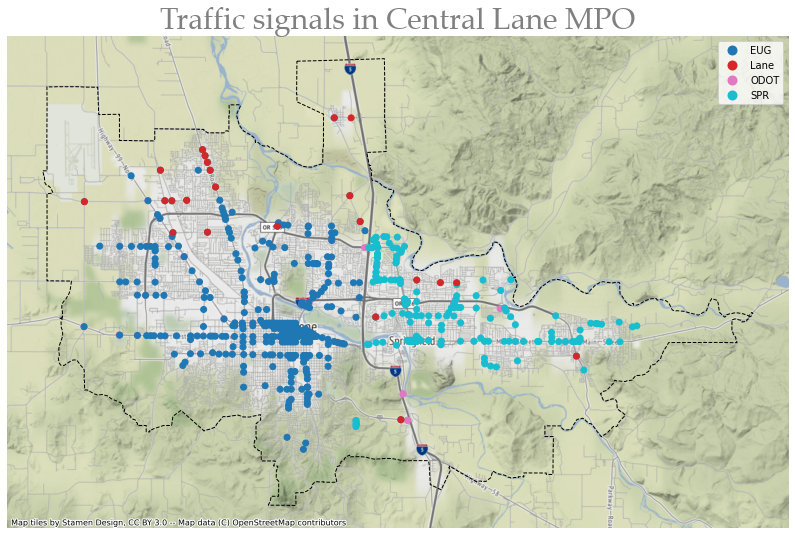

In [73]:
fig, ax = plt.subplots(figsize=(14, 12))
signals.plot(ax=ax, column='source', cmap='tab10', legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Traffic signals in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");